# Import and Basic Manipulations of Financial Data

This notebook present the basics of importing and manipulating financial data. I use a fresh Anaconda installation for Python 3.4.

## Library used:

* Numpy: scientific library for python
* Matplotlib: library to realize plots
* Seaborn: to make nice plots. As to now, is not part of the standard installation in Anaconda. Provided that you have an internet connection, in the Anaconda command line run the following command:
    > `conda install seaborn`
* pandas: library for data manipulation and analysis
* pandas_datareader: library to import the data from the web (yahoo finance, google finance, etc.) into pandas object.  As to now, is not part of the standard installation in Anaconda. Provided that you have an internet connection, in the Anaconda command line run the following command:
    > `pip install pandas_datareader`

In [1]:
%matplotlib inline

import numpy as np  # this imports the NumPy library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk")


import pandas as pd
from pandas_datareader import data as web
from datetime import datetime


## Import of Historical Stock Price from Yahoo and Basic Manipulations

To get the historical daily prices from [Yahoo](http://finance.yahoo.com/), you need
* the tick codes (for instance 'MSFT' for Microsoft) of the stocks you want
* the time span: start and end


In [4]:
start = datetime(2001, 1, 1)
end = datetime(2015,6,1)
stock_tickers = 'MSFT'
msft = web.DataReader(stock_tickers, "yahoo", start, end)


In [3]:
# Print the first 10 lines of our data
msft[:10]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,44.1250,45.0000,42.8750,43.3750,82413200,15.231921
2001-01-03,43.1875,48.8750,43.1250,47.9375,135962200,16.834126
2001-01-04,47.8125,50.5000,46.8750,48.4375,112397000,17.009710
2001-01-05,48.5000,49.8750,47.5625,49.1250,93414600,17.251139
2001-01-08,48.9375,49.7500,46.6875,48.9375,79817600,17.185295
2001-01-09,50.0000,52.6250,49.7500,51.8125,114965400,18.194903
2001-01-10,51.0000,53.8125,50.7500,52.8750,90230200,18.568019
2001-01-11,53.0000,55.7500,52.3125,55.0000,101854800,19.314252
2001-01-12,54.8750,55.0000,52.5000,53.5000,73712000,18.787500


Add different the moving averages to our data.

For a given length $N$, the moving average $MA(x,N)$ of a sample $x=(x_0,x_1,\ldots,x_t,\ldots)$ is given by
\begin{equation*}
    MA_t(x,N)=\frac{1}{N}\sum_{k=t-(N-1)}^t x_k,\quad t\geq N+1
\end{equation*}

In [4]:
msft['MA7']   = pd.rolling_mean(msft['Adj Close'], 7)
msft['MA30']  = pd.rolling_mean(msft['Adj Close'], 30)
msft['MA90']  = pd.rolling_mean(msft['Adj Close'], 90)
msft['MA120'] = pd.rolling_mean(msft['Adj Close'], 120)

And plot it with matplot lib beautified by seaborn:

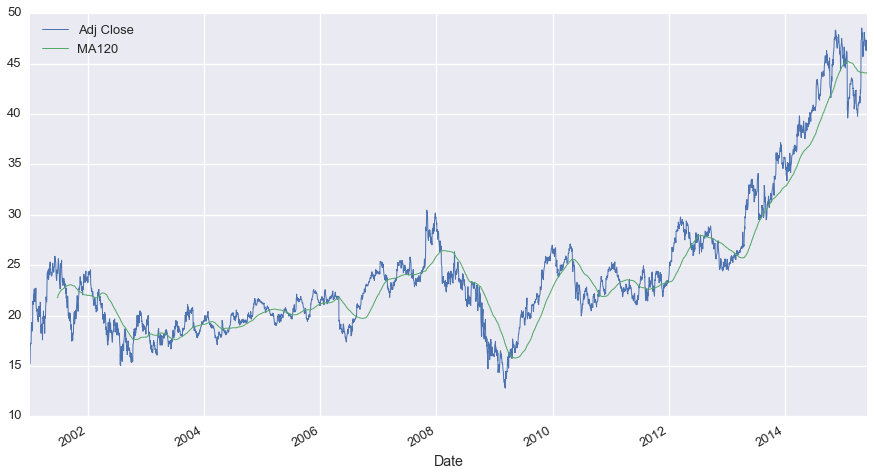

In [5]:
msft[:][['Adj Close','MA120']].plot(figsize=(15,8),linewidth='1')

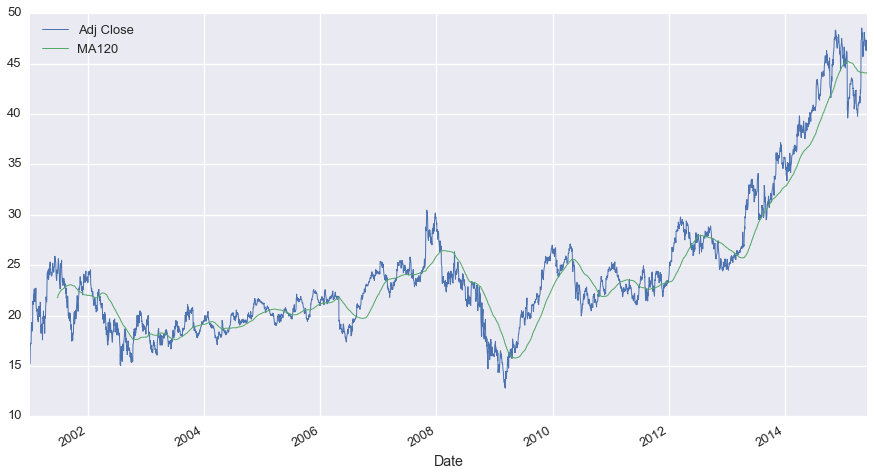

In [6]:
# To remove the message <matplotlib.axes._subplots.AxesSubplot at 0x7f70656e5860> from the plot outputs
# assign a temporarry name to the plot as follows
_ = msft[:][['Adj Close','MA120']].plot(figsize=(15,8),linewidth='1')

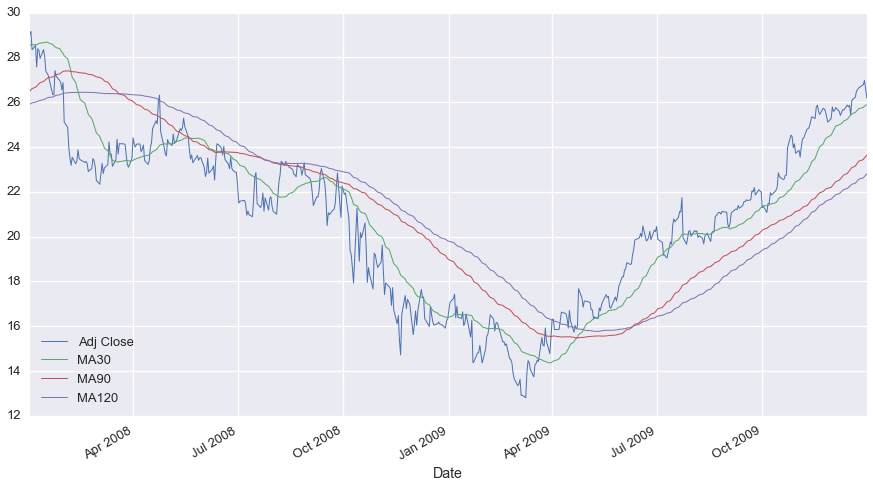

In [7]:
_ = msft['2008':'2009'][['Adj Close','MA30','MA90','MA120']].plot(figsize=(15,8),linewidth='1')

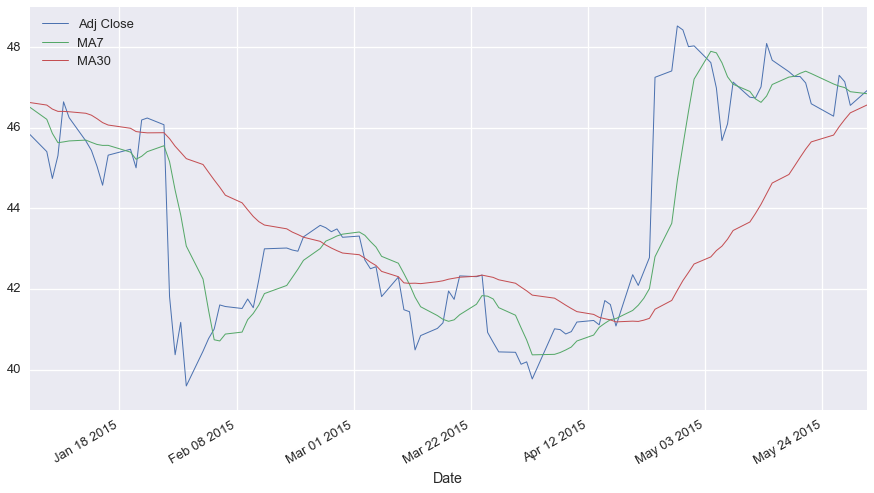

In [8]:
_ = msft['2015'][['Adj Close','MA7','MA30']].plot(figsize=(15,8),linewidth='1')

We can add to any Pandas object new rows and use the intern computation mehtods of these objects which are way more efficient than standard loops.

If we denote by $S=S_0,\ldots,S_t,\ldots$ the stock price we add to the panda object
* the returns $R=R_1,\ldots,R_t,\ldots$ defined as  $S_t=S_{t-1}(1+R_t)$, that is $R_t=(S_t-S_{t-1})/S_{t-1}$;
* the log prices $s=s_0,\ldots,s_t,\ldots$ defined as $s_t=\ln(S_t)$;
* the log returns $r=r_1,\ldots,r_t,\ldots$ defind as $r_t=\ln(1+R_t)=\ln(S_t/S_{t-1})=s_t-s_{t-1}$;


In [9]:
msft['Log Price']=np.log(msft['Adj Close']) # add the colon Log Price filled with the log of adj close
msft['Return']=(msft['Adj Close'] - msft['Adj Close'].shift(1))/msft['Adj Close'].shift(1) # use the efficient shift method instead of a panfull loop
msft['Log Return']=(msft['Log Price']-msft['Log Price'].shift(1)) # idem here

And plot them

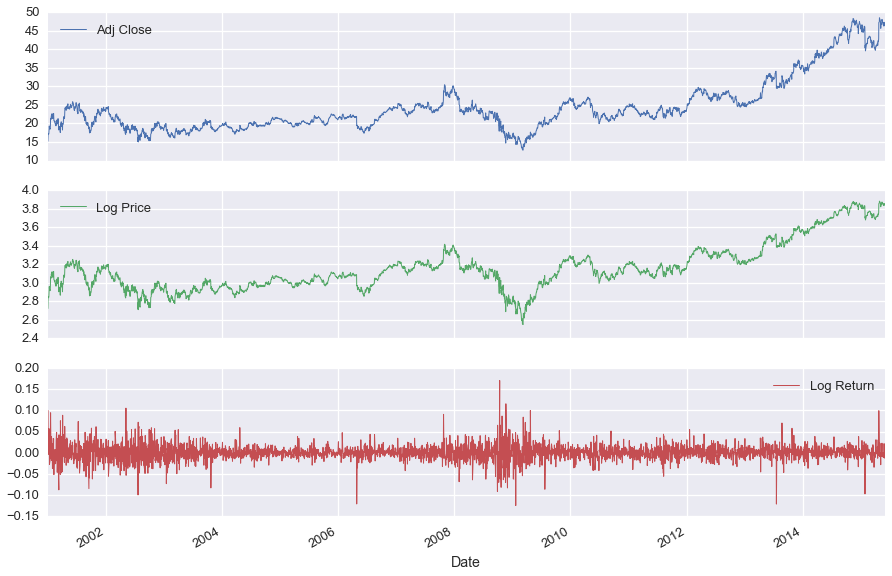

In [10]:
_ = msft[:][['Adj Close','Log Price', 'Log Return']].plot(subplots=True, figsize=(15,10), linewidth='1')

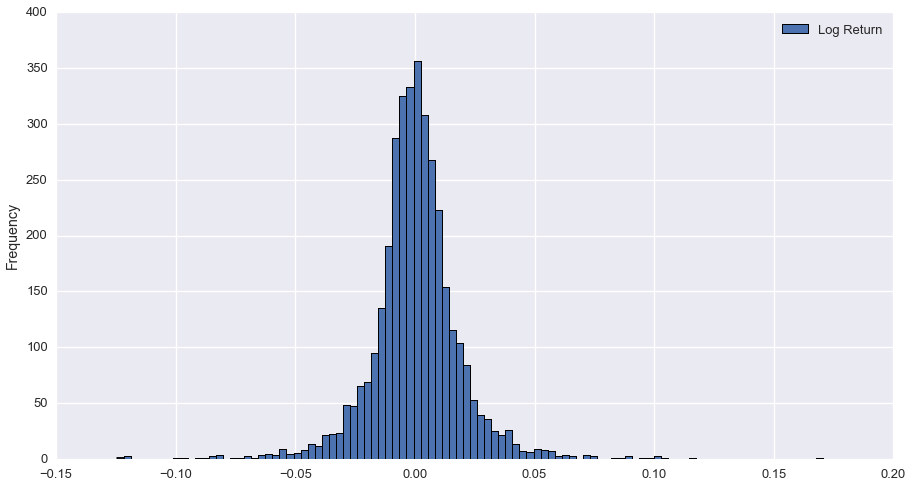

In [11]:
_ = msft[:][['Log Return']].plot.hist(figsize=(15,8), linewidth='1', bins=100)

## Geometric Brownian Motion as a Basic Model

The most basic assumption about stock prices is that the log returns are iid and normally distributed, that is $r_t\sim \mathcal{N}(\mu,\sigma)$, where $\mathcal{N}(\mu,\sigma)$ is the normal probability distribution:
\begin{equation*}
    P[r_t \in A]=\frac{1}{\sqrt{2\pi \sigma^2}}\int_A \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) dx, \quad A\subseteq \mathbb{R}\text{ Borel set.}
\end{equation*}
In other terms
\begin{equation*}
    r_t=\mu+\sigma Z_t
\end{equation*}
where $Z_0,\ldots, Z_t,\ldots$ are iid and $Z_t\sim \mathcal{N}(0,1)$. 

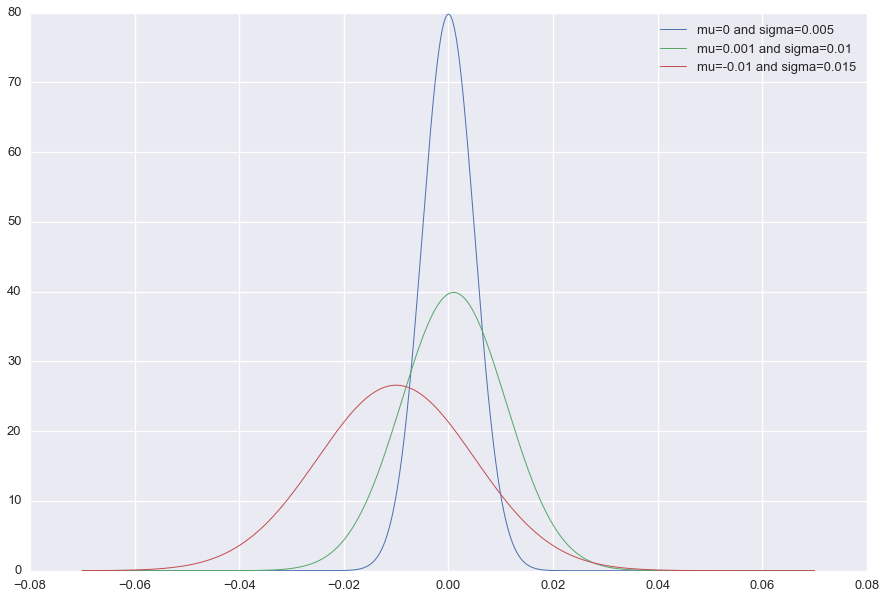

In [12]:
from scipy.stats import norm

range = np.arange(-0.07, 0.07, 0.00001)

fig, axn = plt.subplots(figsize=(15, 10))

axn.plot(range, norm.pdf(range, 0, 0.005), linewidth='1',label='mu=0 and sigma=0.005')
axn.plot(range, norm.pdf(range, 0.001, 0.01), linewidth='1', label='mu=0.001 and sigma=0.01')
axn.plot(range, norm.pdf(range, -0.01, 0.015), linewidth='1', label='mu=-0.01 and sigma=0.015')

_ = plt.legend(loc='best')

Following this model, we compute the mean and standard deviation from our data

In [13]:
mu = msft['Log Return'].mean()
sigma =msft['Log Return'].std()

print(mu,sigma)

0.0003105336145190962 0.018601874723272235


And plot sample paths for the price, log price, return and log return when the log return is given by the geometric brownian motion over the period start/end given for the stock price above.

In [14]:
dates = pd.date_range(start, end)

# generate 3 sample paths of log returns

stock = pd.DataFrame(mu + sigma * np.random.randn(len(dates), 3), index=dates, columns=['Log Return0', 'Log Return1', 'Log Return2'])
stock[['Log Price0', 'Log Price1','Log Price2']] = stock[['Log Return0', 'Log Return1', 'Log Return2']].cumsum()
stock[['Return0', 'Return1','Return2']] = np.exp(stock[['Log Return0', 'Log Return1', 'Log Return2']])-1
stock[['Price0', 'Price1','Price2']] = (1+stock[['Return0', 'Return1', 'Return2']]).cumprod()

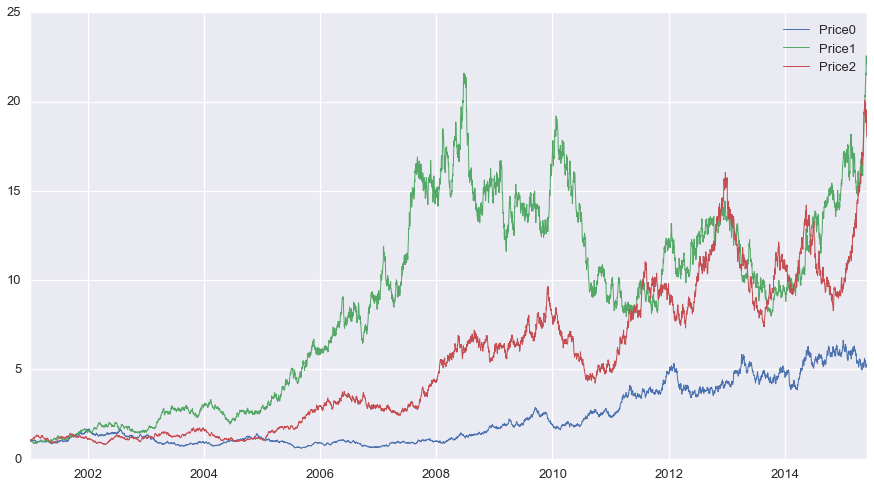

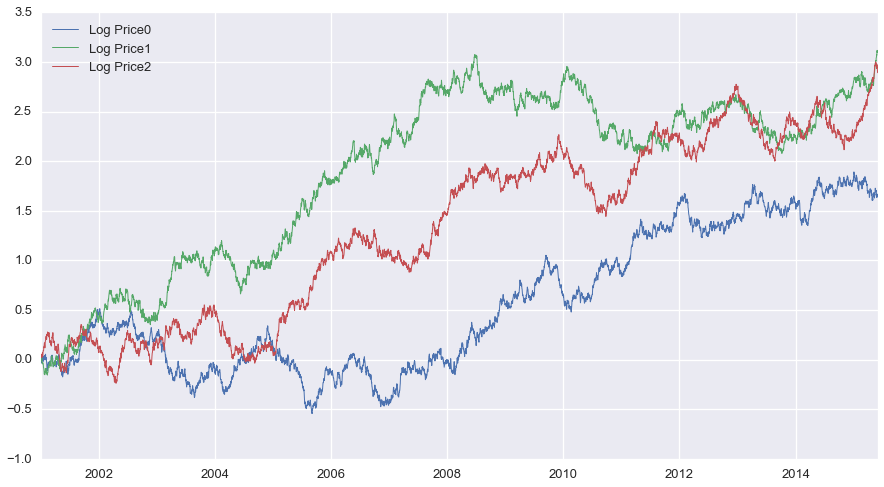

In [15]:
_ = stock[:][['Price0', 'Price1','Price2']].plot(figsize=(15,8), linewidth=1)
_ = stock[:][['Log Price0', 'Log Price1','Log Price2']].plot(figsize=(15,8), linewidth=1)


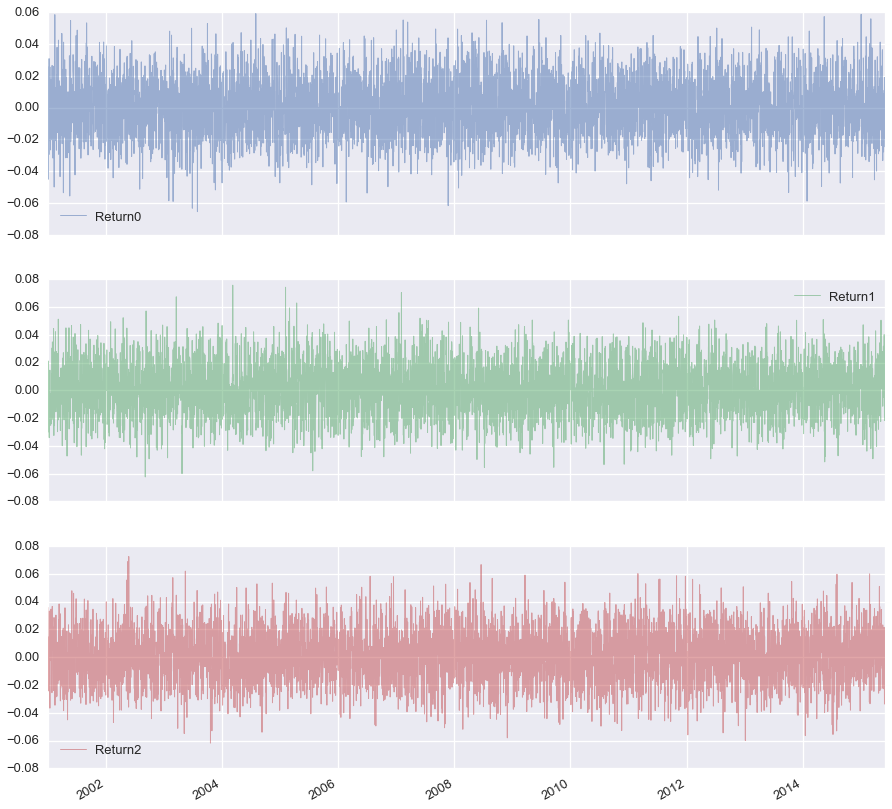

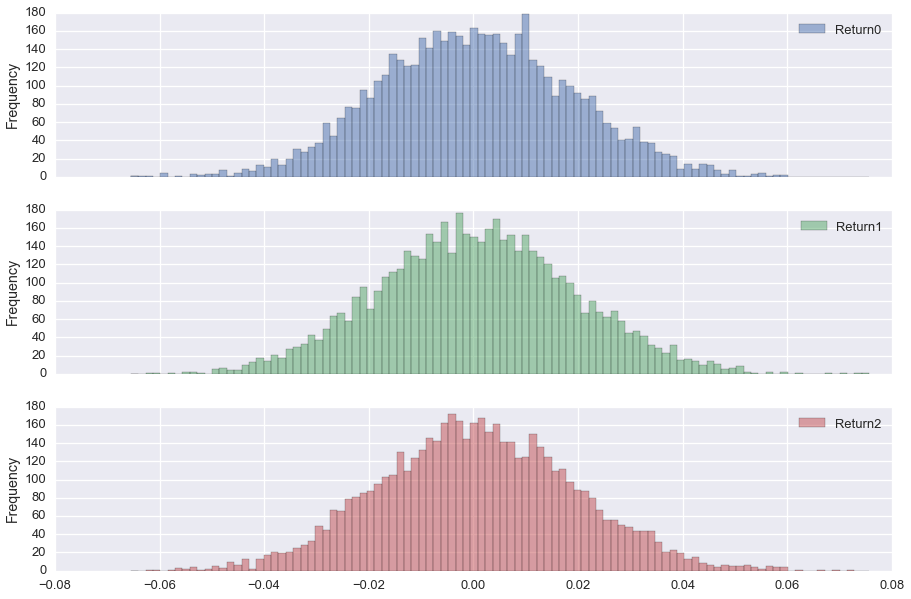

In [16]:
_ = stock[:][['Return0', 'Return1', 'Return2']].plot(subplots=True, figsize=(15,15), linewidth=1, alpha=0.5)
_ = stock[:][['Return0','Return1','Return2']].plot.hist(subplots=True, figsize=(15,10), bins=100, alpha=0.5)


We want to compare the log returns from the datas with respect to the model. We therefore concatenate the objects and plot them.

You see that the geometric brownian motion is far from reality.

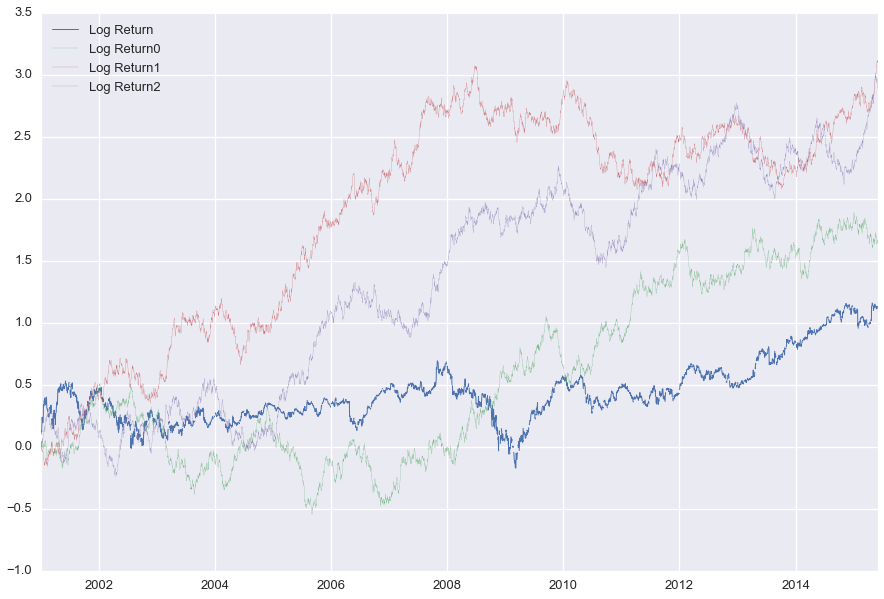

In [17]:
comp_logreturn = pd.concat([msft['Log Return'], stock['Log Return0'], stock['Log Return1'], stock['Log Return2']], axis =1)

linewidths = [1, 0.2, 0.2, 0.2, 0.2, 0.2]
fig, ax = plt.subplots(figsize=(15,10))
for col, lw in zip(comp_logreturn.columns, linewidths):
    comp_logreturn[col].cumsum().plot(lw=lw, ax=ax, legend=col)

_= plt.legend(loc='best')


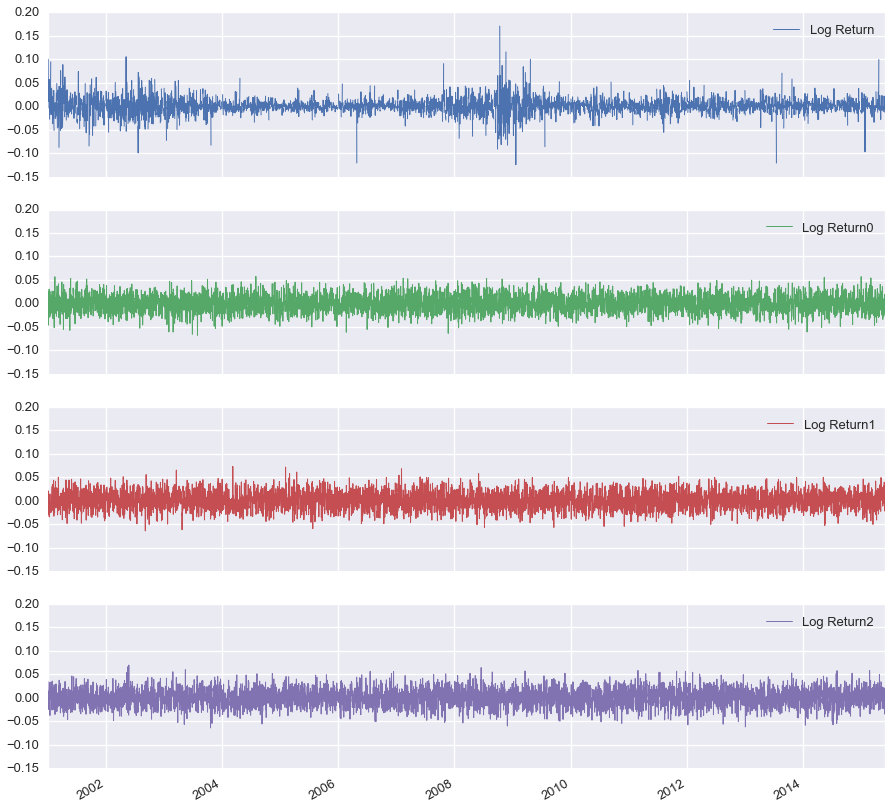

In [18]:
_ = comp_logreturn[['Log Return', 'Log Return0', 'Log Return1', 'Log Return2']].plot(figsize=(15,15), subplots=True, linewidth=1, ylim=[-0.15,0.20])

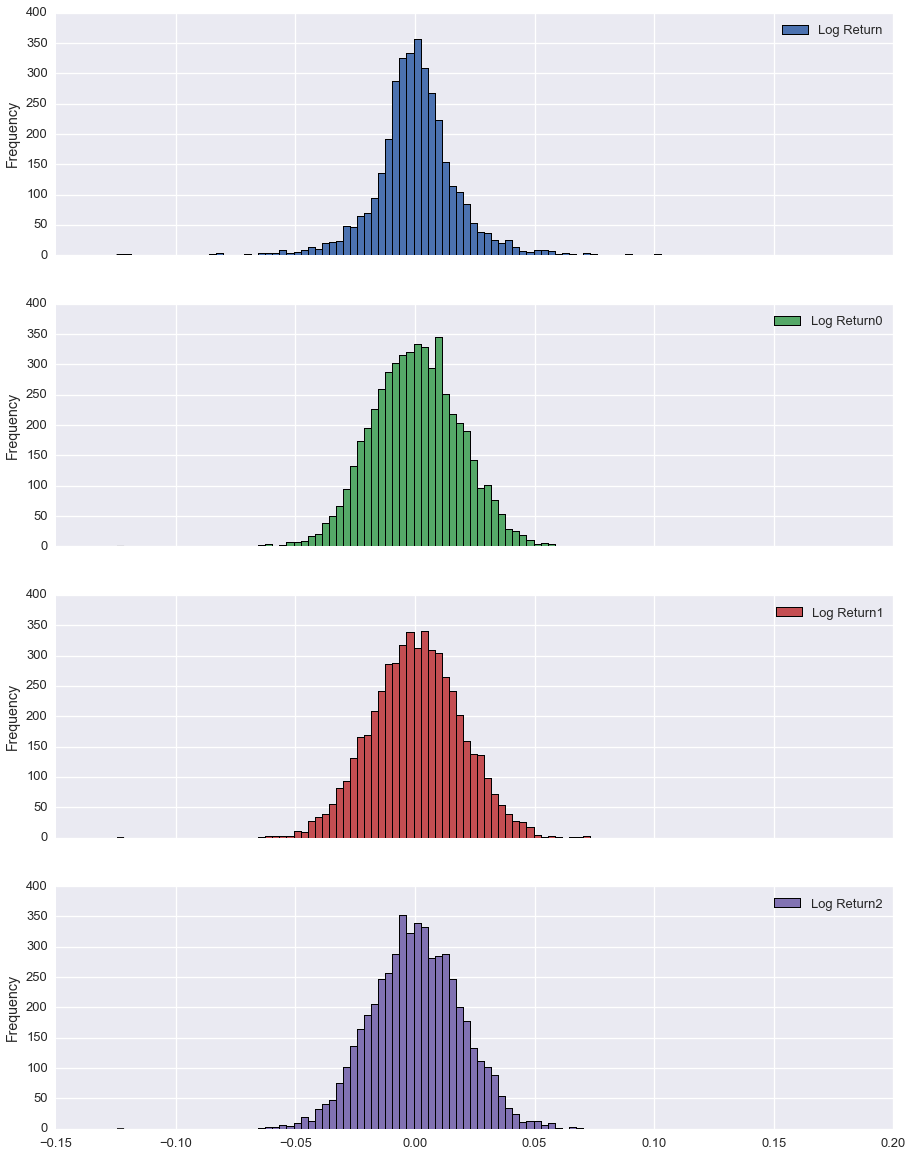

In [19]:
_ = comp_logreturn[['Log Return', 'Log Return0', 'Log Return1', 'Log Return2']].plot.hist(figsize=(15,20), subplots=True, linewidth=1, bins=100, xlim=[-0.15, 0.20], ylim=[0,400])
